# Comp1800 Coursework Data Exploration Notebook

### Import libraries to be used in to expoler this data

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import hvplot.pandas
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import cm
from statsmodels.tsa.seasonal import seasonal_decompose

### variable to save plots too

In [2]:
PATH = "/home/michael/DataSciMSc/comp1800-DataVis/coursework/plots"

### Assign CSV files to varaibles 

In [3]:
data = pd.read_csv("https://tinyurl.com/ChrisCoDV/001002629/DailyCustomers.csv", index_col = 0)
data.index = pd.to_datetime(data.index)
store_marketing = pd.read_csv("https://tinyurl.com/ChrisCoDV/001002629/StoreMarketing.csv", index_col = 0)
store_overheads = pd.read_csv("https://tinyurl.com/ChrisCoDV/001002629/StoreOverheads.csv", index_col = 0)
store_size = pd.read_csv("https://tinyurl.com/ChrisCoDV/001002629/StoreSize.csv", index_col = 0)
store_staff = pd.read_csv("https://tinyurl.com/ChrisCoDV/001002629/StoreStaff.csv", index_col = 0)

### check files have loaded

print("Daily Customers\n",data.head())
print("\n\nStore Marketing\n",store_marketing.head())
print("\n\nStore Overheads\n",store_overheads.head())
print("\n\nStore Size\n", store_size.head())
print("\n\nStore Staff\n",store_staff.head())

### create summary dataframe

In [4]:
summary_data = pd.DataFrame(index=data.columns)
summary_data['Staff'] = store_staff.values
summary_data['Total Customers'] = data.sum().values # sum of all daily visits 
summary_data['Size'] = store_size.values
summary_data['Overheads'] = store_overheads.values
summary_data['Marketing'] = store_marketing.values
print(summary_data.head())

     Staff  Total Customers  Size  Overheads  Marketing
RGS     12           183484  1597      92000      19000
RAH     41           390690  4601      26000      38000
TAP      6            29012   422      93000       4000
DTJ      4            24414   309      16000       3000
VYZ      3            24650   335      38000       3000


### Define a function that can draw time series graphs with or without rolling average data and trendlines

In [5]:
def displayFigure(Data, figX, FigY, linewidth1, 
                  xlabel, ylabel, title, showLegend = False,
                 showRollingData = False, rollingData = 0,
                  linewidth2 = 0, legend = [], showTrendLine= False,
                  save_plot = False, path = PATH, file_name = ""):
    
    plt.figure(figsize=(figX, FigY))
    plt.plot(Data, linewidth=linewidth1)
    
    """
    if block to display a rolling average 
    - inputs 
        showRollingData = Boolen
        rollingData = List
        linewidth = int 
    
    - outputs
        plot of average for data over time
    """
    if(showRollingData == True):
        plt.gca().set_prop_cycle(None) # reset colours
        plt.plot(rollingData, linewidth=linewidth2)
        
    """
    if block to add trend line
    - inputs
        showTrendLine = Boolen
        selected = list
    - outputs
        trend plot using selected data
    """
    if(showTrendLine == True):
        plt.gca().set_prop_cycle(None) # reset colours
        for name in legend:
            x = np.arange(len(data[name]))
            z = np.polyfit(x, data[name], 1)
            trend = np.poly1d(z)
            plt.plot(data.index, trend(x), linestyle='--')
            
            
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.title(title, fontsize=20)
    if(showLegend == True):
        plt.legend(legend, loc=2)
        
    if(save_plot== True):
        plt.savefig('%s/%s.png'%(path,file_name), transparent=True, bbox_inches='tight')  
    plt.show()

### categories data by total visitor count to find any stores that have opened or closed

In [6]:
categories = ['High', 'Medium', 'Low', 'Very Low']
categories_selected = [[] for i in range(len(categories))]
for name in data.columns:
    total_visitors = data[name].sum()
    if total_visitors > 200000:
        category = 0
    elif total_visitors > 50000:
        category = 1
    elif total_visitors > 18000:
        category = 2
    elif total_visitors > 500:
        category = 3
    else:
        category = 4
    categories_selected[category].append(name)
    print('Store ' + name + ' is ' + categories[category] + ' volume')

for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))

Store RGS is Medium volume
Store RAH is High volume
Store TAP is Low volume
Store DTJ is Low volume
Store VYZ is Low volume
Store NGB is Very Low volume
Store TSE is Low volume
Store DZT is Low volume
Store ENY is Low volume
Store NMO is Very Low volume
Store VSM is Low volume
Store WGR is Low volume
Store QMD is Medium volume
Store YGY is Low volume
Store MAJ is Very Low volume
Store OMV is Medium volume
Store PAA is Medium volume
Store BTB is Low volume
Store BZM is Low volume
Store CNQ is Low volume
Store NAQ is Medium volume
Store OSG is Medium volume
Store WYG is Low volume
Store UGJ is Low volume
Store PGL is Medium volume
Store ATT is Low volume
Store YYO is Very Low volume
Store SMM is High volume
Store ZSD is Very Low volume
Store EFN is Low volume
Store XML is Low volume
Store XSV is Very Low volume
Store AEI is Very Low volume
Store WMB is Low volume
Store CFG is Low volume
Store SGA is High volume
Store ZMS is Very Low volume
Store MUY is Medium volume
Store QSN is High vol

In [7]:
vCount_high_volume = ['RAH', 'SGA', 'SMM', 'QSN']
vCount_medium_volume = ['PAA', 'RGS', 'QMD', 'OSG', 'NAQ', 'PGL', 'OMV', 'MUY']
vCount_low_volume = ['EFN', 'ENY', 'WYG', 'WMB', 'TSE', 'TAP', 'YGY', 'UGJ', 'BTB', 'XML', 'BZM', 'UMU', 'CFG', 'VSM', 'VYZ', 'DTJ', 'CNQ', 'ATT', 'WGR', 'DZT']
vCount_very_low_volume = ['XSV', 'NMO', 'YYO', 'NGB', 'AEI', 'ZMS', 'MAJ', 'ZSD']

In [8]:
period = 14 # variable used to specify the number of days
rolling_average = data.rolling(window=period).mean() # using the rolling average 

In [9]:
## interactive plot to see dates of opening and closeing stores based of visitor count
plot = data[vCount_very_low_volume].hvplot.line(
    frame_height = 500, frame_width = 500,
    xlabel = 'Date', ylabel = 'Visitors',
    title = 'Stores that have opened or closed'
)
hvplot.show(plot)

Launching server at http://localhost:41841


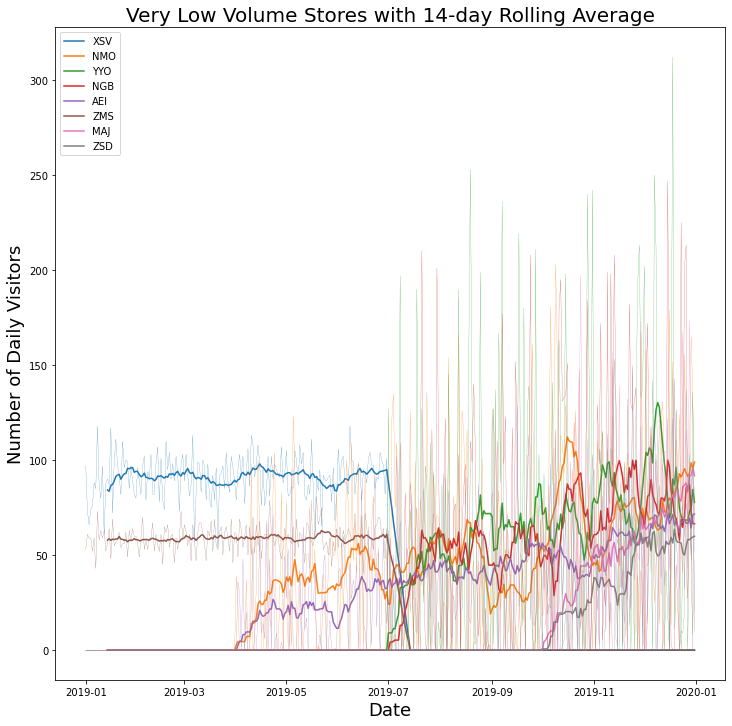

In [10]:
"""
By swapping the rolling average data and the selected data variables, we are able to 
make the legend clearer with thicker lines displaying for each column.
"""
displayFigure(rolling_average[vCount_very_low_volume], # Display Rolling average data
              12, # fig size X
              12, # fig size Z
              1.5, # linewidth
              "Date", # xlabel
              "Number of Daily Visitors", # y label
              "Very Low Volume Stores with 14-day Rolling Average", # Title
              legend = vCount_very_low_volume,
              showLegend = True, # Display legend
              showRollingData = True, # data
              rollingData = data[vCount_very_low_volume], # Rolling average data
              linewidth2 = 0.2,# linewidth for rolling average 
              showTrendLine = False,
              save_plot = True,
              file_name = "very_low_vol_RA") # Show trendline

In [11]:
summary_data_transpose = summary_data.transpose() # flips rows and columns
print(summary_data_transpose.head()) # view head of transposed data

                    RGS     RAH    TAP    DTJ    VYZ    NGB    TSE    DZT  \
Staff                12      41      6      4      3      2      5      3   
Total Customers  183484  390690  29012  24414  24650  11618  31208  21702   
Size               1597    4601    422    309    335    142    563    216   
Overheads         92000   26000  93000  16000  38000  64000  60000  57000   
Marketing         19000   38000   4000   3000   3000   1000   4000   3000   

                   ENY    NMO  ...    XML    XSV    AEI    WMB    CFG     SGA  \
Staff                6      2  ...      4      2      4      7      5      57   
Total Customers  32847  14658  ...  27728  16528  11530  32298  26388  365618   
Size               644    180  ...    332    151    218    528    346    4078   
Overheads        17000  71000  ...  33000  86000  66000  84000  61000   30000   
Marketing         4000   2000  ...   3000   2000   1000   3000   3000   37000   

                   ZMS     MUY     QSN    UMU  
St

In [12]:
categories = ['High', 'Medium', 'Low']
categories_selected = [[] for i in range(len(categories))]
for name in summary_data_transpose.columns:
    store_size = summary_data_transpose[name][2]
    if store_size > 3500:
        category = 0
    elif store_size > 1000:
        category = 1
    else:
        category = 2
    
    categories_selected[category].append(name)
    print('Store' + name + ' is ' + categories[category] + ' size')

for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))


StoreRGS is Medium size
StoreRAH is High size
StoreTAP is Low size
StoreDTJ is Low size
StoreVYZ is Low size
StoreNGB is Low size
StoreTSE is Low size
StoreDZT is Low size
StoreENY is Low size
StoreNMO is Low size
StoreVSM is Low size
StoreWGR is Low size
StoreQMD is Medium size
StoreYGY is Low size
StoreMAJ is Low size
StoreOMV is Medium size
StorePAA is Medium size
StoreBTB is Low size
StoreBZM is Low size
StoreCNQ is Low size
StoreNAQ is Medium size
StoreOSG is Medium size
StoreWYG is Low size
StoreUGJ is Low size
StorePGL is Medium size
StoreATT is Low size
StoreYYO is Low size
StoreSMM is High size
StoreZSD is Low size
StoreEFN is Low size
StoreXML is Low size
StoreXSV is Low size
StoreAEI is Low size
StoreWMB is Low size
StoreCFG is Low size
StoreSGA is High size
StoreZMS is Low size
StoreMUY is Medium size
StoreQSN is High size
StoreUMU is Low size
High: ['RAH', 'SMM', 'SGA', 'QSN']
Medium: ['RGS', 'QMD', 'OMV', 'PAA', 'NAQ', 'OSG', 'PGL', 'MUY']
Low: ['TAP', 'DTJ', 'VYZ', 'NGB'

### sort stores into categories high, medium, low based on size(m3)

In [13]:
## create lists based from the data seen above with high, medium and low sized stores
high_volume = ['RAH', 'SMM', 'SGA', 'QSN']
medium_volume =  ['RGS', 'QMD', 'OMV', 'PAA', 'NAQ', 'OSG', 'PGL', 'MUY']
low_volume = ['TAP', 'DTJ', 'VYZ', 'NGB', 'TSE', 'DZT', 'ENY', 'NMO', 'VSM', 'WGR', 'YGY', 'MAJ', 'BTB', 'BZM', 'CNQ', 'WYG', 'UGJ', 'ATT', 'YYO', 'ZSD', 'EFN', 'XML', 'XSV', 'AEI', 'WMB', 'CFG', 'ZMS', 'UMU']

### create bar char based on size

In [14]:
#summary_data = summary_data.reindex(summary_data.values(ascending=False).index, axis=2)
summary_data = summary_data.sort_values(by=['Size'], ascending=False) # sorting dataframe by size with largest first
print(summary_data.head(15))

     Staff  Total Customers  Size  Overheads  Marketing
SMM     68           333848  4949      92000      31000
RAH     41           390690  4601      26000      38000
QSN     45           313958  4112      21000      27000
SGA     57           365618  4078      30000      37000
QMD     39           164844  3128      14000      15000
PAA     23           193305  2858      13000      20000
PGL     29           146568  2479      91000      15000
OSG     23           154677  2349      38000      18000
OMV     28           134055  2116      33000      13000
RGS     12           183484  1597      92000      19000
NAQ     13           154051  1334      79000      13000
MUY     11           112536  1219      86000      10000
ENY      6            32847   644      17000       4000
TSE      5            31208   563      60000       4000
WMB      7            32298   528      84000       3000


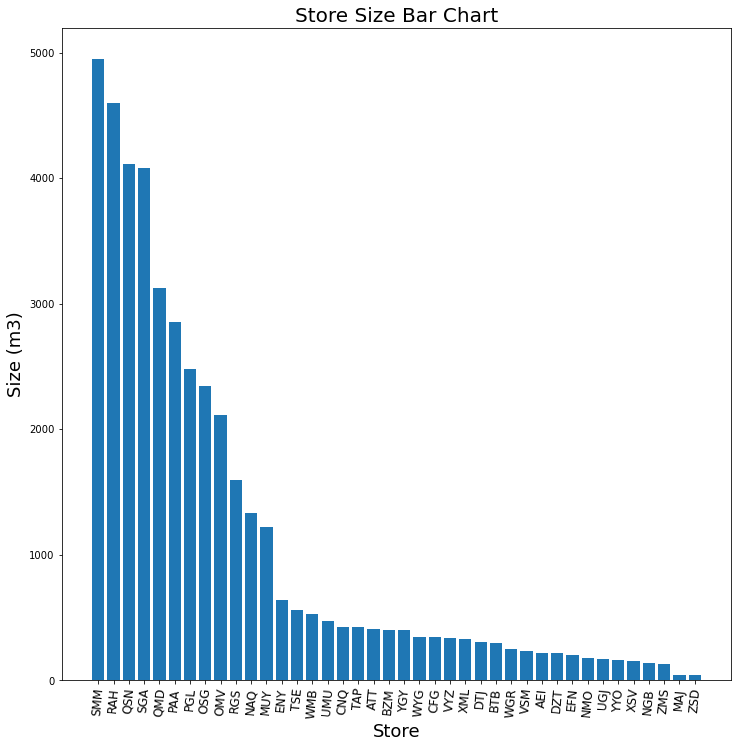

In [15]:
plt.figure(figsize=(12, 12))
x_pos = np.arange(len(data.columns))
plt.bar(x_pos,summary_data["Size"], align='center')
plt.xticks(x_pos, summary_data.index, rotation=85, fontsize=12)
plt.xlabel('Store', fontsize=18)
plt.ylabel('Size (m3)', fontsize=18)
plt.title('Store Size Bar Chart', fontsize=20)
plt.savefig('%s/store_size_bar.png'%(PATH), transparent=True,bbox_inches='tight') 
plt.show()

### Bar charts based on store sizes

In [16]:
"""
inputs -
dataframe - list
title - string
figsize - int
filename - string
save_file - bool

outputs-
print - top 15 values from dataframe
barchart with 
"""
def bar_chart(data_frame, title, figsize, file_name = "", save_file = False):
    selected = summary_data_transpose.loc["Size",data_frame] # [row indexer, column indexer]
    selected = selected.reindex(selected.sort_values(ascending=False).index, axis=1)
    print(selected.head(15))
    plt.figure(figsize=(figsize, figsize))
    ax = selected.plot.barh(x=selected[0], y=selected[1])
    plt.xticks(rotation=0)
    for index, value in enumerate(selected): # adds value to bar for exact sizing
        plt.text(value - 800, index - 0.1, str(value), color='white', fontweight='bold')
    plt.xlabel('Size (m3)', fontsize=18)
    plt.ylabel('Store', fontsize=18)
    plt.title(title + ' Store Size Bar Chart', fontsize=20)
    if(save_file == True):
        plt.savefig('%s/%s.png'%(PATH,file_name), transparent=True,bbox_inches='tight') 
        print("\nFile saved as " + file_name +".png")
    plt.show()

SMM    4949
RAH    4601
QSN    4112
SGA    4078
Name: Size, dtype: int64


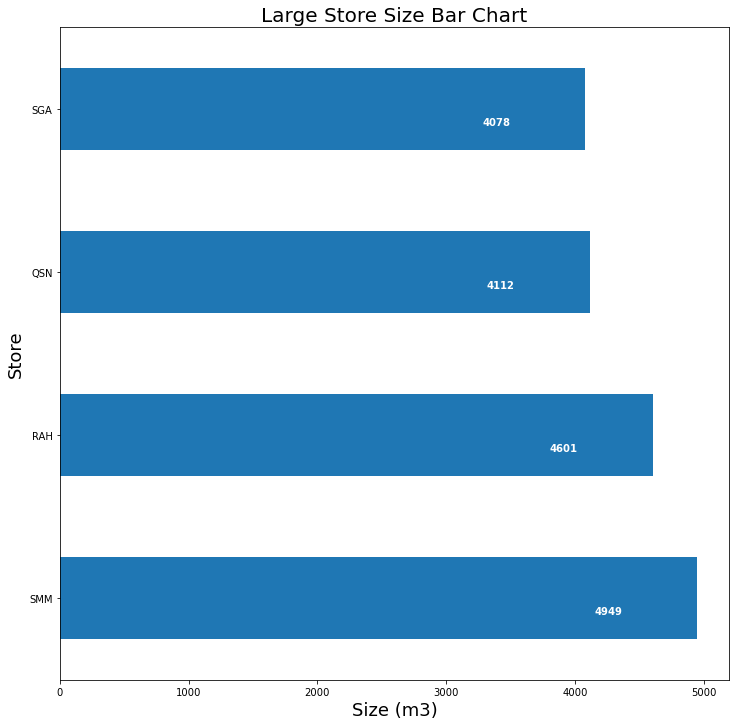

In [17]:
bar_chart(high_volume, "Large", 12)

QMD    3128
PAA    2858
PGL    2479
OSG    2349
OMV    2116
RGS    1597
NAQ    1334
MUY    1219
Name: Size, dtype: int64


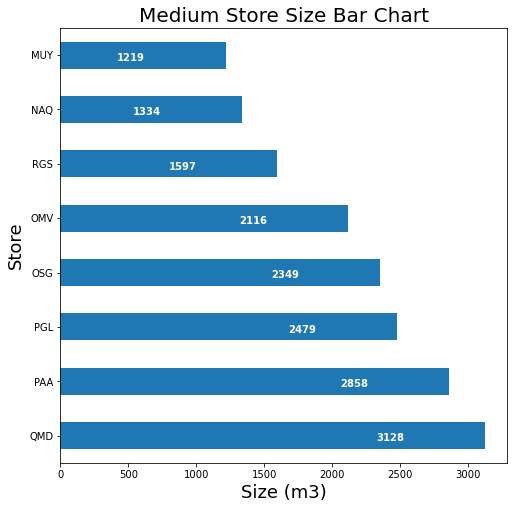

In [18]:
bar_chart(medium_volume, "Medium", 8)

SMM    4949
RAH    4601
QSN    4112
SGA    4078
QMD    3128
PAA    2858
PGL    2479
OSG    2349
OMV    2116
RGS    1597
NAQ    1334
MUY    1219
Name: Size, dtype: int64

File saved as High_Medium_bar_size.png


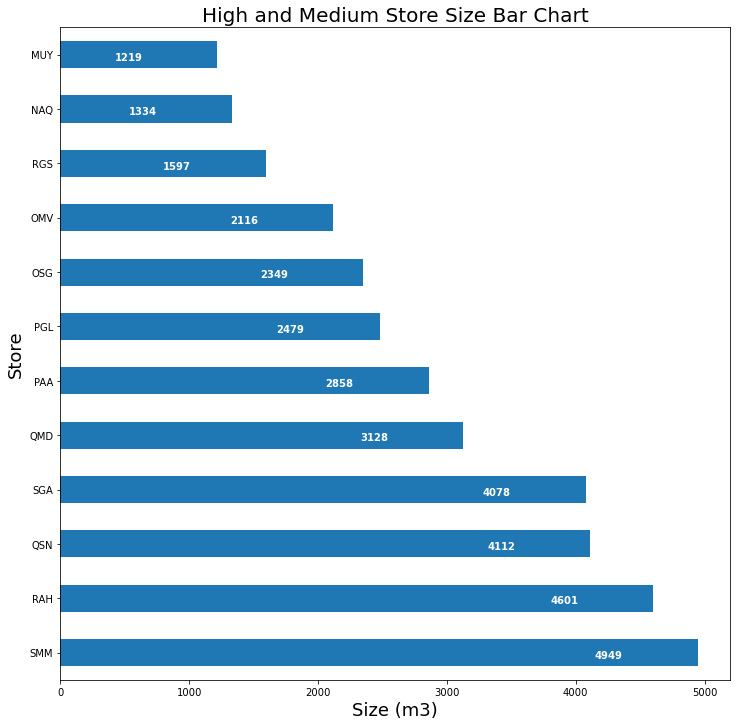

In [19]:
combined = high_volume + medium_volume
bar_chart(combined, "High and Medium", 12, "High_Medium_bar_size", True)

In [20]:
def auto_correlation(data, selected):
    for name in selected:
        pd.plotting.autocorrelation_plot(data[name])
        #plt.xlim([0, 50]) # uncomment this line to zoom in
        plt.title('Store ' + name)
        plt.show()

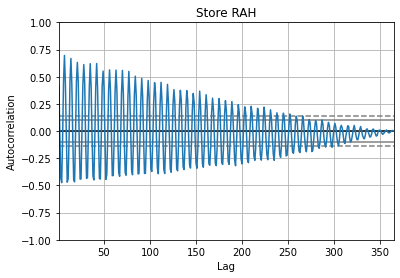

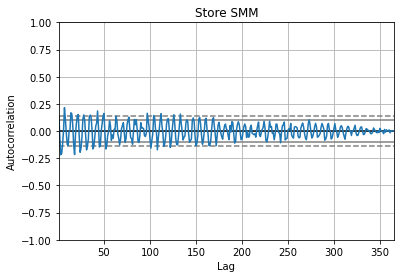

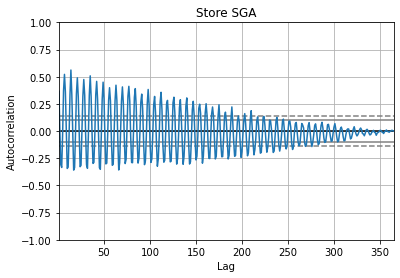

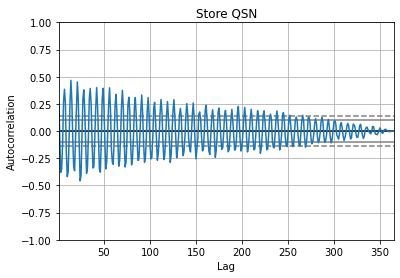

In [21]:
auto_correlation(data, high_volume)

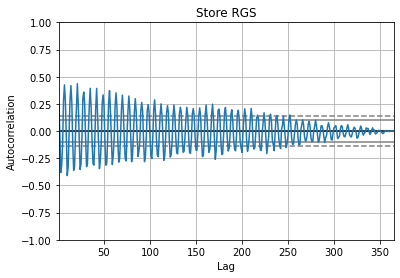

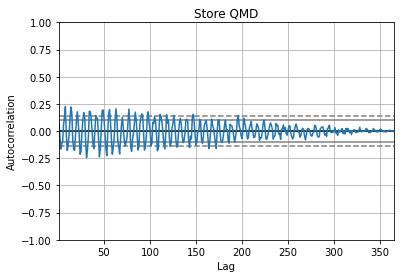

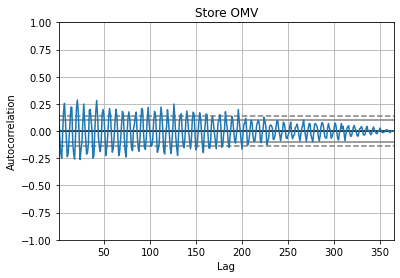

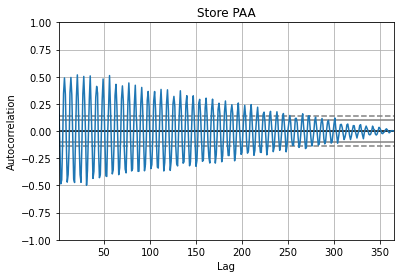

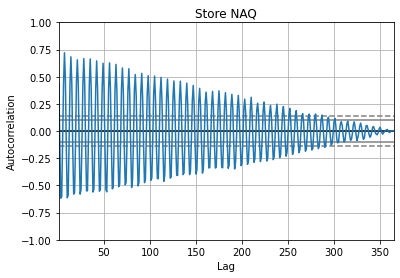

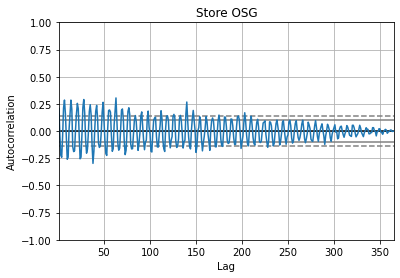

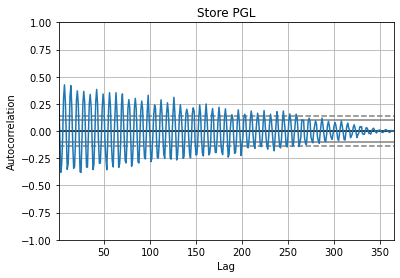

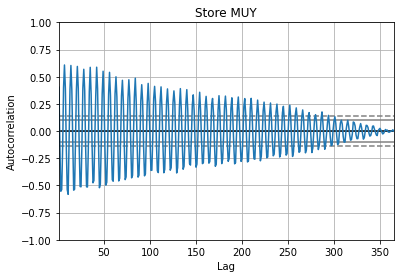

In [22]:
auto_correlation(data, medium_volume)

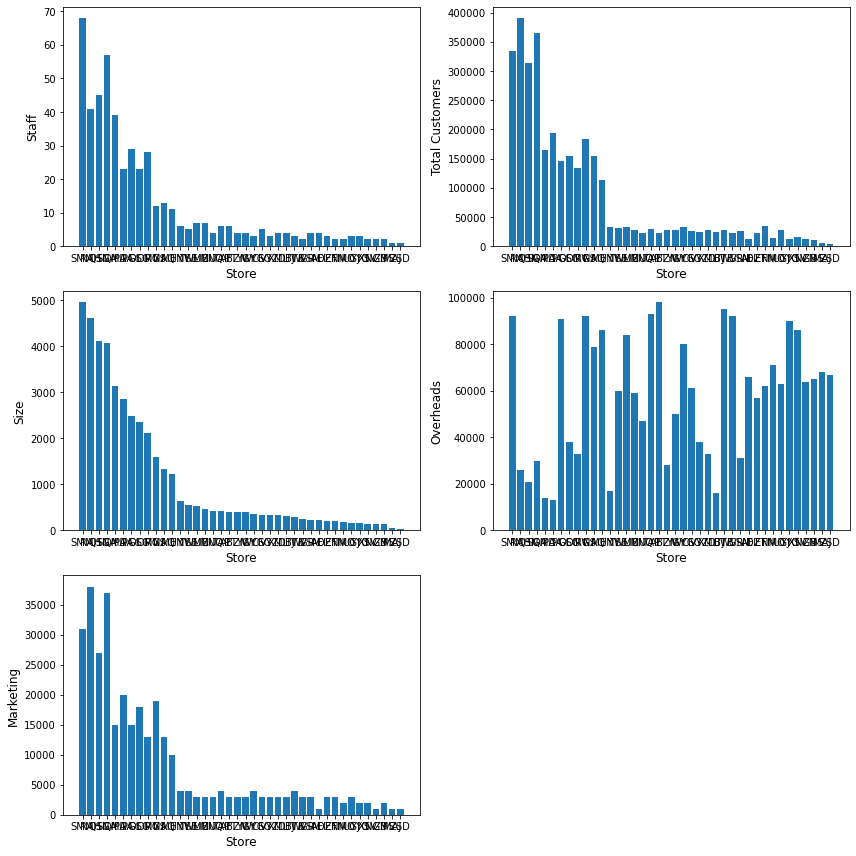

In [23]:
plt.figure(figsize=(12, 12))
counter = 1
x_pos = np.arange(len(summary_data.index))
for attribute in summary_data:
    sub = plt.subplot(3, 2, counter)
    sub.bar(x_pos, summary_data[attribute], align='center')
    sub.set_xticks([])
    sub.set_xticks(x_pos)
    sub.set_xticklabels(summary_data.index)
    sub.set_xlabel('Store', fontsize=12)
    sub.set_ylabel(attribute, fontsize=12)
    counter += 1
plt.tight_layout()
plt.show()

### interactive heatmap

In [24]:
plot = data.corr().hvplot.heatmap(
    frame_height=500, frame_width=500,
    title='Interactive Customer Visit correlations',
    rot=90, cmap='coolwarm'  # see http://holoviews.org/user_guide/Colormaps.html
).opts(invert_yaxis=True, clim=(-1, 1))
hvplot.show(plot)

Launching server at http://localhost:37659


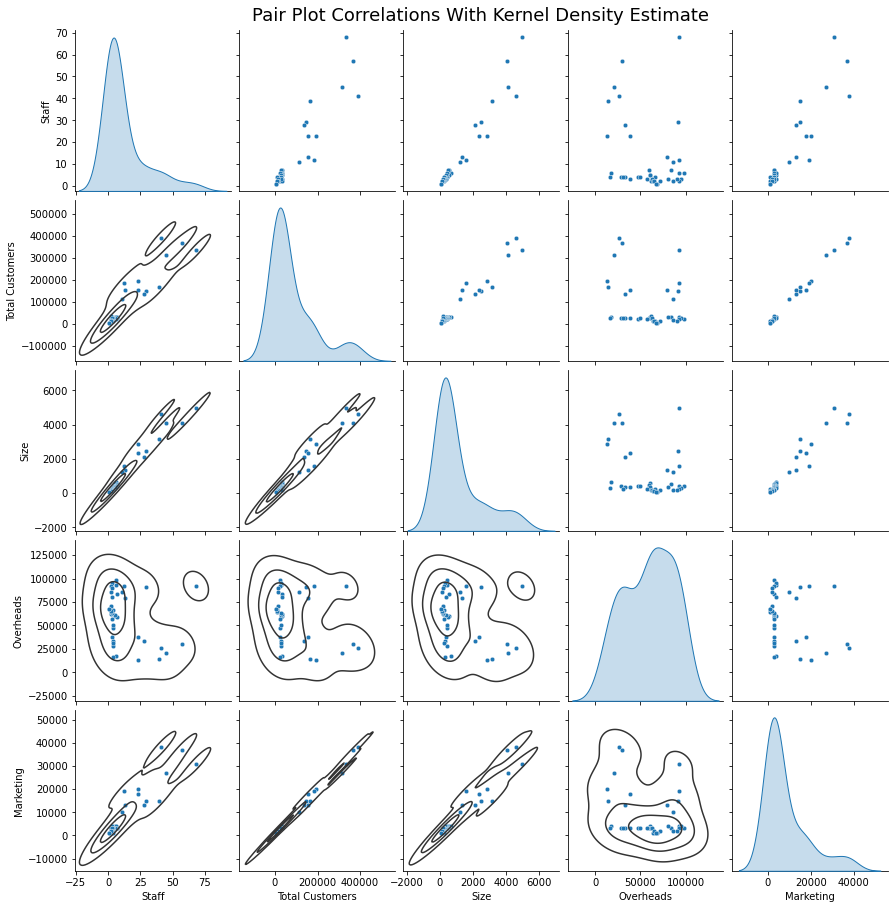

In [25]:
pp = sns.pairplot(summary_data, 
                 #height=1.5, 
                 plot_kws={'s': 20},
                  diag_kind="kde",
                 corner=False)
pp.map_lower(sns.kdeplot, #kernel density estimation
             levels=4, # number of "rings" to use
             color=".2") # colour
pp.fig.suptitle("Pair Plot Correlations With Kernel Density Estimate ",  
                y=1.01,
                x=0.535,
               fontsize = 18)
#plt.savefig('%s/pairplot.png'%(PATH), transparent=True,bbox_inches='tight') 
plt.show()

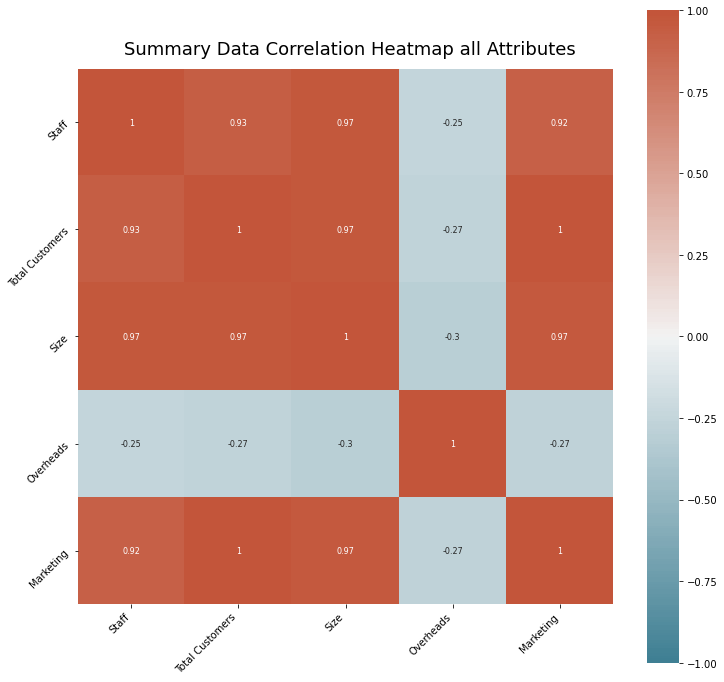

In [26]:
plt.figure(figsize=(12, 12))
plt.gcf().text(.44, .835, 
               "Summary Data Correlation Heatmap all Attributes", 
               fontsize = 18, color='Black' ,ha='center', va='center')
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')
#plt.savefig('%s/heatmap.png'%(PATH), transparent=True,bbox_inches='tight') 
plt.show()

In [27]:
# line sub plot function 
def linesub(data, selected, subx, suby, store_category, file_name = "", save_plot = False):
    counter = 1
    fig = plt.figure(figsize=(8, 8))
    fig.suptitle(store_category + ' Daily Store Visitors', fontsize=20, position=(0.5, 1.0))
    for name in selected:
        sub = fig.add_subplot(subx, suby, counter)
        sub.set_title('Store ' + name, fontsize=10)
        sub.plot(data.index, data[name], linewidth=0.5)
        sub.axes.get_xaxis().set_ticks([])  # remove the x ticks
        counter += 1
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    if(save_plot== True):
        plt.savefig('%s/%s.png'%(path,file_name), transparent=True, bbox_inches='tight') 
    plt.show()

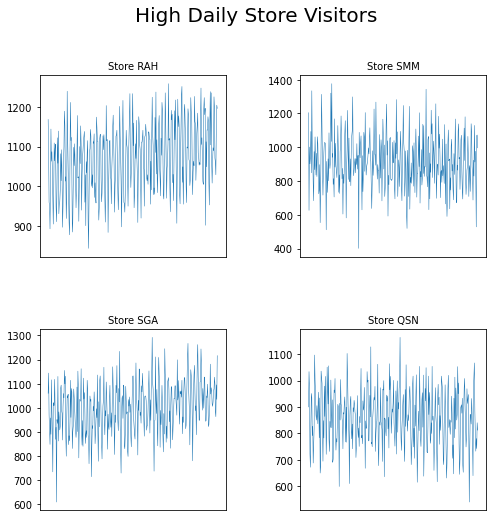

In [28]:
linesub(data, high_volume, 2,2, "High")

### interactive chart, frequency for visits per day

In [29]:
x_min = 390
x_max = 1400
bin_width = 30
n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

plot = data[high_volume].hvplot.hist(
    frame_height=500, frame_width=500,
    xlabel='Frequency', ylabel='Customers',
    title='Daily Store Visits for Large Stores',
    alpha=0.35, muted_alpha=0.25, muted_fill_alpha=0, muted_line_alpha=0,
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset'],
    bins=bins
)
hvplot.show(plot)

34 bins
Launching server at http://localhost:39137


### Radar plots

In [30]:
def radarPlot(normalised_data, 
              selected, 
              subplot_x, 
              subplot_y,
              radar_title, 
              filename,
              save_fig = False):
    n_attributes = len(normalised_data.columns)
    angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
    #plt.figure(figsize=(12, 12))
    fig = plt.figure(figsize=(12, 12))
    fig.suptitle(radar_title, fontsize=16)
    counter = 1
    for name in selected:
        values = normalised_data.loc[[name]].values.flatten().tolist()
        values += values[:1]
        sub = plt.subplot(subplot_x, subplot_y, counter, polar=True)
        sub.plot(angles, values)
        sub.fill(angles, values, alpha=0.1)
        sub.set_ylim(ymax=1.05)
        sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
        sub.set_xticks(angles[0:-1])
        sub.set_xticklabels(normalised_data.columns, fontsize=8)
        sub.set_title('Store ' + name, fontsize=12, loc='left')
        counter += 1
    plt.tight_layout()
    if save_fig==True: 
        plt.savefig('%s/%s.png'%(PATH,filename), 
                    transparent=True,
                    bbox_inches='tight')
    plt.show()

In [31]:
normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

        Staff  Total Customers      Size  Overheads  Marketing
SMM  1.000000         0.854509  1.000000   0.938776   0.815789
RAH  0.602941         1.000000  0.929683   0.265306   1.000000
QSN  0.661765         0.803599  0.830875   0.214286   0.710526
SGA  0.838235         0.935826  0.824005   0.306122   0.973684
QMD  0.573529         0.421930  0.632047   0.142857   0.394737


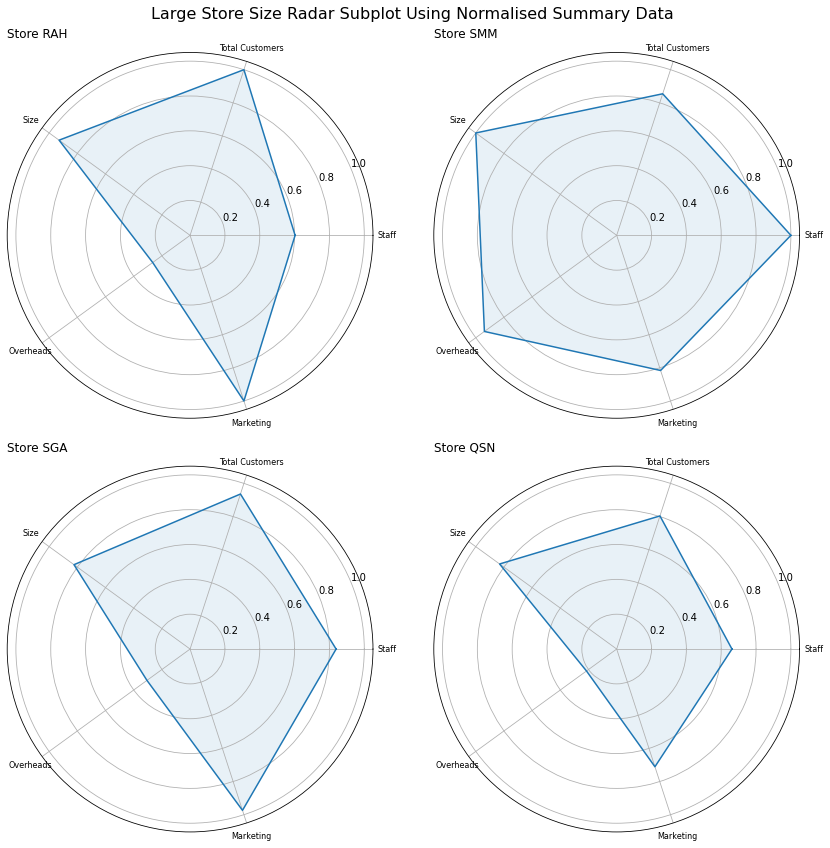

In [32]:
radarPlot(normalised_data, high_volume, 2, 2, 
          "Large Store Size Radar Subplot Using Normalised Summary Data",
         "highVolRadarPlot", 
          save_fig = True)

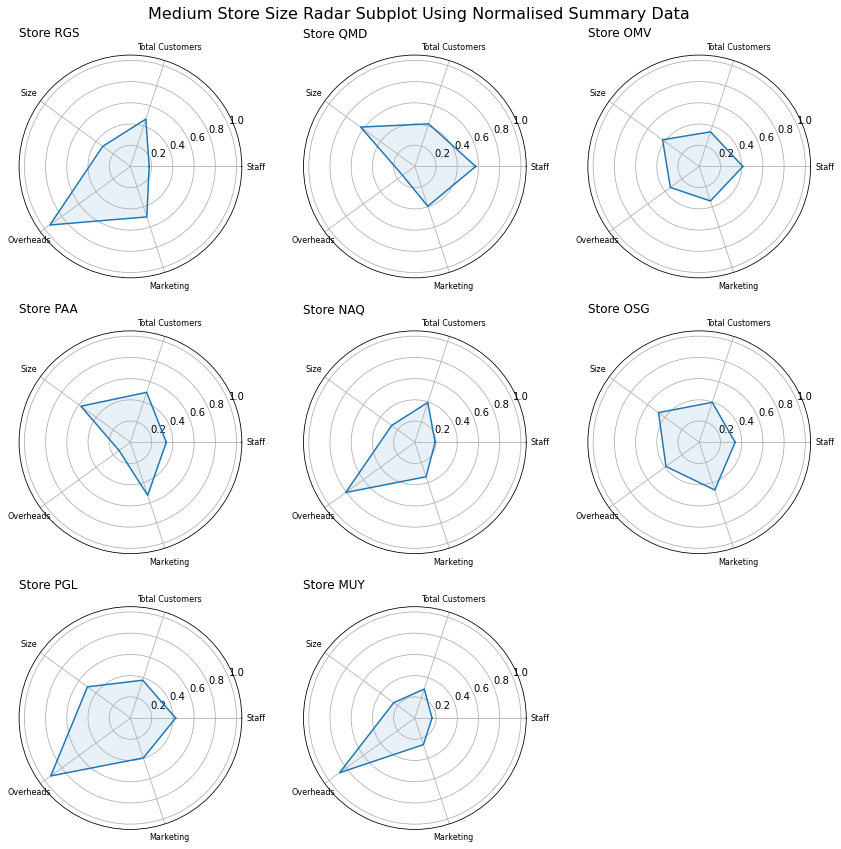

In [33]:
radarPlot(normalised_data, medium_volume, 3, 3, 
          "Medium Store Size Radar Subplot Using Normalised Summary Data",
         "medVolRadarPlot", 
          save_fig = True)

### Bubble plots

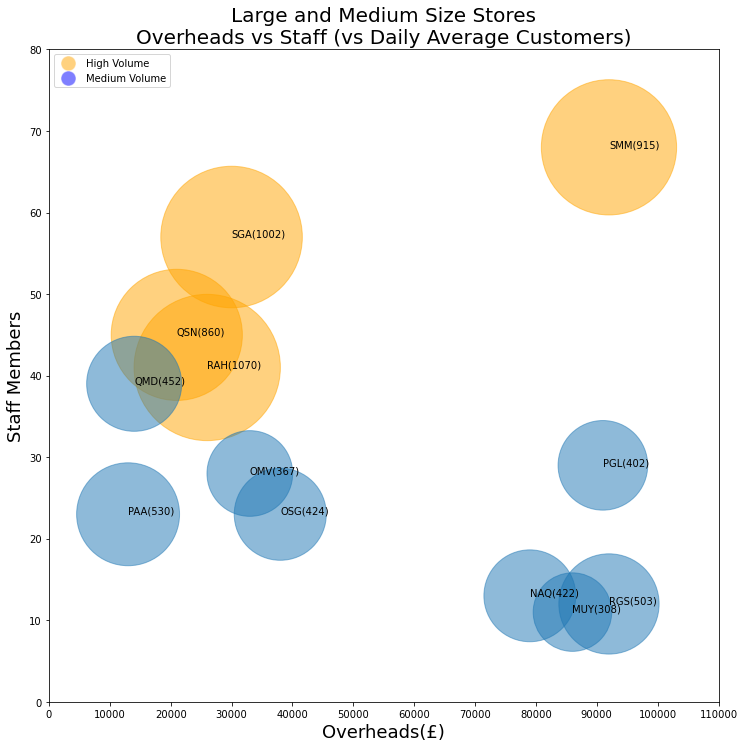

In [114]:
summary_data_bubble = summary_data.loc[high_volume]
summary_data_bubble_medium = summary_data.loc[medium_volume]
#summary_data_bubble['BubbleSize'] = summary_data['Staff'] * 20
summary_data_bubble['BubbleSize'] = (summary_data['Total Customers']/365) * 20
summary_data_bubble_medium['BubbleSize'] = (summary_data['Total Customers']/365) * 20
# custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='High Volume',
                          markerfacecolor='orange',alpha=0.5, markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Medium Volume',
                          markerfacecolor='blue',alpha=0.5, markersize=15)]

plt.figure(figsize=(12, 12))
plt.scatter(summary_data_bubble['Overheads'], 
            summary_data_bubble['Staff'], 
            s=summary_data_bubble['BubbleSize'], 
            color='orange',
            alpha=0.5)
plt.scatter(summary_data_bubble_medium['Overheads'], 
            summary_data_bubble_medium['Staff'], 
            s=summary_data_bubble_medium['BubbleSize'], 
            
            alpha=0.5)
#plt.scatter(summary_data_bubble['Overheads'], 
#            summary_data_bubble['Size'], 
#            s=summary_data_bubble['BubbleSize'], alpha=0.5)
plt.xticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000])
plt.yticks([0,10,20,30,40,50,60,70,80])
plt.title('Large and Medium Size Stores\nOverheads vs Staff (vs Daily Average Customers)', fontsize=20)
plt.xlabel('Overheads(£)', fontsize=18)
plt.ylabel('Staff Members', fontsize=18)
for i, name in enumerate(summary_data_bubble.index):
    plt.annotate(name + "(" + str("{:.0f}".format(summary_data_bubble["Total Customers"][i]/365)) + ")", 
                 (summary_data_bubble['Overheads'][i], 
                  summary_data_bubble['Staff'][i]))
for i, name in enumerate(summary_data_bubble_medium.index):
    plt.annotate(name + "(" + str("{:.0f}".format(summary_data_bubble_medium["Total Customers"][i]/365)) + ")", 
                 (summary_data_bubble_medium['Overheads'][i], 
                  summary_data_bubble_medium['Staff'][i]))
plt.legend(handles=legend_elements, loc='upper left')
#plt.savefig('%s/high_med_vol_bubble_plot_OverheadvstaffVsCustomers.png'%(PATH), transparent=True, bbox_inches='tight')  
plt.show()
plt.show()

### scatter plots A Vs B

In [ ]:
def scatter():
    plt.figure(figsize=(8, 8))
    plt.scatter(summary_data['Marketing'], summary_data['Sales'])
    plt.title('Marketing spend vs Sales', fontsize=20)
    plt.xlabel('Marketing spend (£)', fontsize=18)
    plt.ylabel('Sales', fontsize=18)
    for i, name in enumerate(data.columns):
        plt.annotate(name, (summary_data['Marketing'][i] + 300, summary_data['Sales'][i]))
    plt.plot([0, 40000], [0, 20000], linestyle=':', color='black', label='£2.00 per unit')
    plt.plot([0, 40000], [0, 40000], linestyle=':', color='red', label='£1.00 per unit')
    plt.plot([0, 40000], [0, 80000], linestyle=':', color='orange', label='£0.50 per unit')
    plt.plot([0, 40000], [0, 160000], linestyle=':', color='green', label='£0.25 per unit')
    plt.legend(loc=2, title='Marketing spend limits')
    plt.show()

In [44]:
print(summary_data_transpose.head())

                    RGS     RAH    TAP    DTJ    VYZ    NGB    TSE    DZT  \
Staff                12      41      6      4      3      2      5      3   
Total Customers  183484  390690  29012  24414  24650  11618  31208  21702   
Size               1597    4601    422    309    335    142    563    216   
Overheads         92000   26000  93000  16000  38000  64000  60000  57000   
Marketing         19000   38000   4000   3000   3000   1000   4000   3000   

                   ENY    NMO  ...    XML    XSV    AEI    WMB    CFG     SGA  \
Staff                6      2  ...      4      2      4      7      5      57   
Total Customers  32847  14658  ...  27728  16528  11530  32298  26388  365618   
Size               644    180  ...    332    151    218    528    346    4078   
Overheads        17000  71000  ...  33000  86000  66000  84000  61000   30000   
Marketing         4000   2000  ...   3000   2000   1000   3000   3000   37000   

                   ZMS     MUY     QSN    UMU  
St

In [73]:
#selected = summary_data_transpose.loc["Size",data_frame] # [row indexer, column indexer]
test_data = summary_data_transpose.loc["Marketing",high_volume] # [row indexer, column indexer]
print(test_data)



RAH    38000
SMM    31000
SGA    37000
QSN    27000
Name: Marketing, dtype: int64


### Box plot

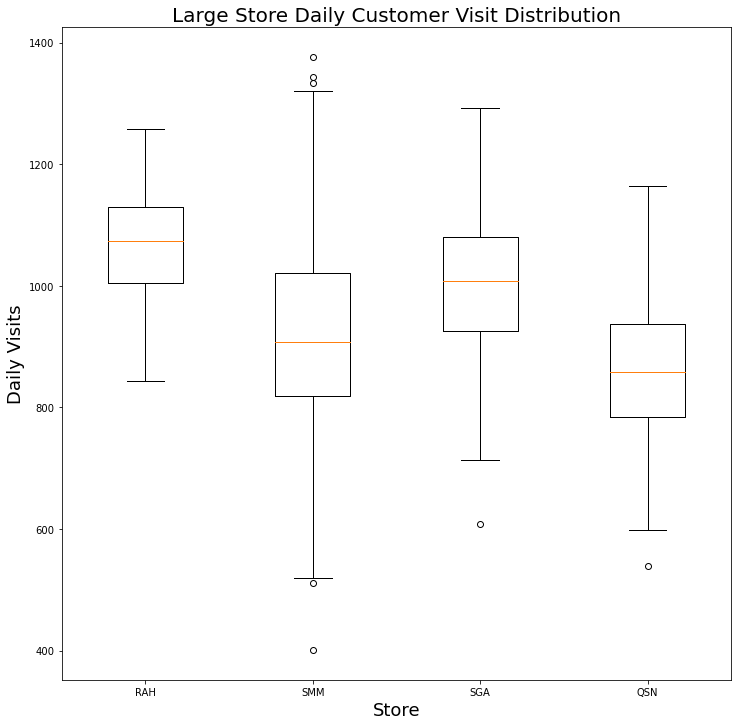

In [109]:
plt.figure(figsize=(12, 12))
#data[high_volume].boxplot()
plt.boxplot(data[high_volume], labels=high_volume)
plt.xlabel('Store', fontsize=18)
plt.ylabel('Daily Visits', fontsize=18)
plt.title('Large Store Daily Customer Visit Distribution', fontsize=20)
#plt.savefig('%s/boxPlot_largeStore_daily_customer.png'%(PATH), transparent=True, bbox_inches='tight') 
plt.show()

### Decompistion 

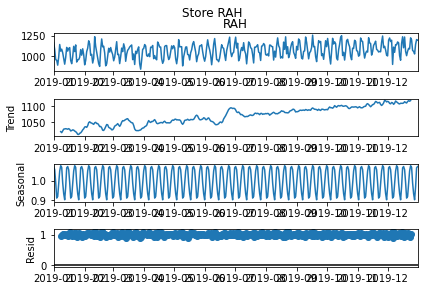

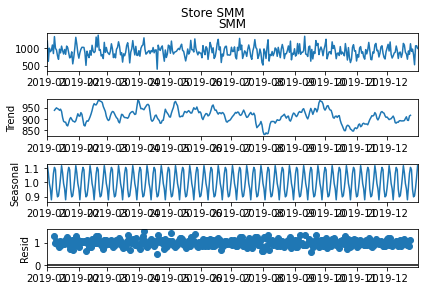

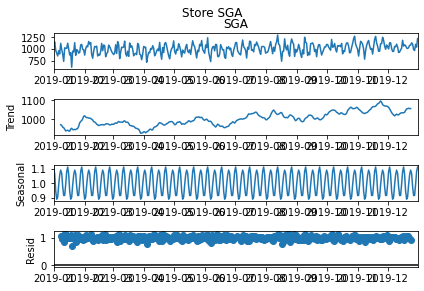

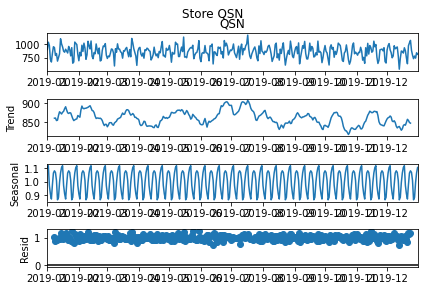

In [101]:
for name in high_volume:
    result = seasonal_decompose(data[name], model='multiplicative', period=14)
    result.plot()
    plt.suptitle('Store ' + name, position=(0.5, 1.0))
    plt.show()